In [74]:
# Import pandas and plotting modules
import pandas as pd
import matplotlib.pyplot as plt
from time import strptime
import datetime, time
from datetime import date
import statsmodels.api as sm
from statsmodels.tsa.stattools import acf
from statsmodels.graphics.tsaplots import plot_acf

# Getting and preparing data from GoogleTrends

In [75]:
data = pd.read_csv('GoogleTrends_summer.csv')
data.head(10)

,date,summer,bikini,diet
0,03/05/2015,29,28,30
1,10/05/2015,34,28,29
2,17/05/2015,31,26,27
3,24/05/2015,34,26,30
4,31/05/2015,52,35,27
5,07/06/2015,61,33,29
6,14/06/2015,53,26,26
7,21/06/2015,49,23,23
8,28/06/2015,86,43,24
9,05/07/2015,57,38,23


In [76]:
#data.index = data[["date"]] 
#data

In [77]:
# Convert the date index to datetime
data["date"] = pd.to_datetime(data["date"], format="%d/%m/%Y")
#data["date"] = data['date'].dt.date
data.head(10)

,date,summer,bikini,diet
0,2015-05-03,29,28,30
1,2015-05-10,34,28,29
2,2015-05-17,31,26,27
3,2015-05-24,34,26,30
4,2015-05-31,52,35,27
5,2015-06-07,61,33,29
6,2015-06-14,53,26,26
7,2015-06-21,49,23,23
8,2015-06-28,86,43,24
9,2015-07-05,57,38,23


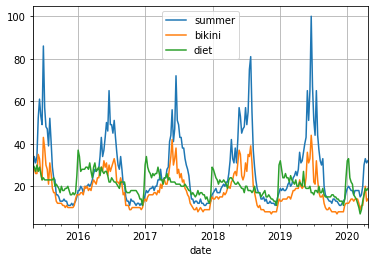

In [78]:
data.plot(x='date', y = ['summer', 'bikini', 'diet'], grid=True)

In [79]:
data_cut = data[data['date'] < '2017-01-01']

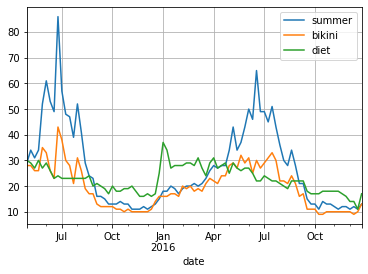

In [80]:
data_cut.plot(x='date', y = ['summer', 'bikini', 'diet'], grid=True)

# Resampling

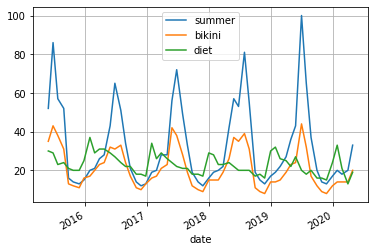

In [81]:
# Convert the weekly data to monthly data
data_R = data.resample('M', on="date").max()
#data_R.head(10)
data_R.plot(x='date', y = ['summer', 'bikini', 'diet'], grid=True)

# First look at correlations, R squared and scatter plots

In [82]:
pct = data[['summer', 'bikini', 'diet']].pct_change()
pct.index = data['date']
pct.head()

,summer,bikini,diet
date,,,
2015-05-03,NaN,NaN,NaN
2015-05-10,0.172414,0.000000,-0.033333
2015-05-17,-0.088235,-0.071429,-0.068966
2015-05-24,0.096774,0.000000,0.111111
2015-05-31,0.529412,0.346154,-0.100000


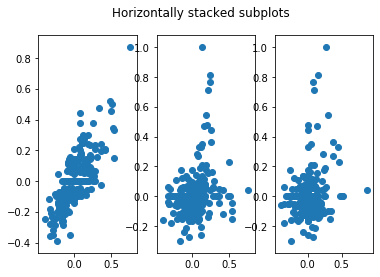

In [83]:
fig, (ax1, ax2,ax3) = plt.subplots(1, 3)
fig.suptitle('Horizontally stacked subplots')
ax1.scatter(pct["summer"],pct["bikini"])
ax2.scatter(pct["summer"],pct["diet"])
ax3.scatter(pct["bikini"],pct["diet"])

plt.show()

In [84]:
corr1 = pct["summer"].corr(pct["bikini"])
print("Correlation of summer and bikini: ", corr1)

corr2 = pct["summer"].corr(pct["diet"])
print("Correlation of summer and diet: ", corr2)

corr3 = pct["bikini"].corr(pct["diet"])
print("Correlation of bikini and diet: ", corr3)


Correlation of summer and bikini:  0.7550582851415347
Correlation of summer and diet:  0.25698971601321136
Correlation of bikini and diet:  0.23492918499996213


In [85]:
data_const = sm.add_constant(data)
data_const.head()

,const,date,summer,bikini,diet
0,1.0,2015-05-03,29,28,30
1,1.0,2015-05-10,34,28,29
2,1.0,2015-05-17,31,26,27
3,1.0,2015-05-24,34,26,30
4,1.0,2015-05-31,52,35,27


In [86]:
result1 = sm.OLS(data_const[['bikini']], data_const[['const', 'summer']]).fit()
#result2 = sm.OLS(data_const[['diet']], data_const[['const', 'summer']]).fit()
#result3 = sm.OLS(data_const[['diet']], data_const[['const', 'bikini']]).fit()
print(result1.summary(), "\n"*2, "---"*30, "\n"*2,  result2.summary(), "\n"*2, "---"*30, "\n"*2,  result3.summary())

                            OLS Regression Results                            
Dep. Variable:                 bikini   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.853
Method:                 Least Squares   F-statistic:                     1505.
Date:                Sat, 20 Jun 2020   Prob (F-statistic):          6.96e-110
Time:                        16:27:53   Log-Likelihood:                -672.25
No. Observations:                 261   AIC:                             1348.
Df Residuals:                     259   BIC:                             1356.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.0503      0.385     13.111      0.0

# Autocorrelation


In [87]:
# Compute and print the autocorrelation (weekly data - % change)
autocorrelation_1 = pct ["bikini"].autocorr()
autocorrelation_2 = pct ["summer"].autocorr()
autocorrelation_3 = pct ["diet"].autocorr()
print("The autocorrelation of (weekly - pct) bikini series is %4.2f" %(autocorrelation_1))
print("The autocorrelation of (weekly - pct) summer series is %4.2f" %(autocorrelation_2))
print("The autocorrelation of (weekly - pct) diet series is %4.2f" %(autocorrelation_3))

The autocorrelation of (weekly - pct) bikini series is -0.03
The autocorrelation of (weekly - pct) summer series is 0.02
The autocorrelation of (weekly - pct) diet series is 0.24


In [88]:
# Compute and print the autocorrelation (weekly data - diff)

w_diff = data[['summer', 'bikini', 'diet']].diff()
w_diff.index = data['date']

autocorrelation_1 = w_diff ["bikini"].autocorr()
autocorrelation_2 = w_diff ["summer"].autocorr()
autocorrelation_3 = w_diff ["diet"].autocorr()
print("The autocorrelation of (weekly - diff) bikini series is %4.2f" %(autocorrelation_1))
print("The autocorrelation of (weekly - diff) summer series is %4.2f" %(autocorrelation_2))
print("The autocorrelation of (weekly - diff) diet series is %4.2f" %(autocorrelation_3))

The autocorrelation of (weekly - diff) bikini series is -0.09
The autocorrelation of (weekly - diff) summer series is -0.12
The autocorrelation of (weekly - diff) diet series is 0.14


In [89]:
# Compute and print the autocorrelation (monthly resampled data - % change)

m_pct = data_R[['summer', 'bikini', 'diet']].pct_change()
m_pct.index = data_R['date']

autocorrelation_1 = m_pct ["bikini"].autocorr()
autocorrelation_2 = m_pct ["summer"].autocorr()
autocorrelation_3 = m_pct ["diet"].autocorr()
print("The autocorrelation of (monthly resampled data  - m_pct) bikini series is %4.2f" %(autocorrelation_1))
print("The autocorrelation of (monthly resampled data  - m_pct) summer series is %4.2f" %(autocorrelation_2))
print("The autocorrelation of (monthly resampled data  - m_pct) diet series is %4.2f" %(autocorrelation_3))

The autocorrelation of (monthly resampled data  - m_pct) bikini series is 0.23
The autocorrelation of (monthly resampled data  - m_pct) summer series is 0.26
The autocorrelation of (monthly resampled data  - m_pct) diet series is -0.12


In [90]:
# Compute and print the autocorrelation (monthly resampled data - diff)

m_diff = data_R[['summer', 'bikini', 'diet']].diff()
m_diff.index = data_R['date']
m_diff

autocorrelation_1 = m_diff ["bikini"].autocorr()
autocorrelation_2 = m_diff ["summer"].autocorr()
autocorrelation_3 = m_diff ["diet"].autocorr()
print("The autocorrelation of (monthly resampled data  - m_diff) bikini series is %4.2f" %(autocorrelation_1))
print("The autocorrelation of (monthly resampled data  - m_diff) summer series is %4.2f" %(autocorrelation_2))
print("The autocorrelation of (monthly resampled data  - m_diff) diet series is %4.2f" %(autocorrelation_3))

The autocorrelation of (monthly resampled data  - m_diff) bikini series is 0.25
The autocorrelation of (monthly resampled data  - m_diff) summer series is 0.09
The autocorrelation of (monthly resampled data  - m_diff) diet series is -0.17


# Autocorrelation function (ACF)

[ 1.          0.67632862  0.26973897 -0.10282678 -0.36381756 -0.47856563
 -0.50317137 -0.46639196 -0.36860853 -0.15327516  0.21518245  0.54650249
  0.62031904  0.50137047  0.2288418  -0.09510773 -0.28973248 -0.37564871
 -0.40763303 -0.38870128 -0.30643993 -0.11781882  0.12431438  0.36110359
  0.50351906  0.41080372  0.15853847 -0.06134087 -0.19632917 -0.26110633
 -0.28522017 -0.27931748 -0.22267641 -0.09860309  0.07903384  0.27311483
  0.35597884  0.30543088  0.1399908  -0.03235141 -0.12094865]


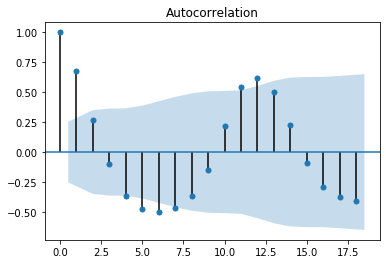

In [91]:
# Compute the acf array of HRB
acf_array = acf(data_R[['summer']], fft=True )
print(acf_array)

#Plot the acf function
plot_acf((data_R[['summer']]))
plt.show()

[ 1.          0.73397935  0.3249137  -0.08472729 -0.38017227 -0.50729033
 -0.52764244 -0.46761186 -0.34837098 -0.10479173  0.26720255  0.56777296
  0.66860308  0.55151231  0.28540947 -0.05775553 -0.31659269 -0.41997403
 -0.4519808  -0.41823487 -0.31832528 -0.08794589  0.19044942  0.42232469
  0.52065621  0.42094059  0.17329783 -0.05225203 -0.19973699 -0.27066936
 -0.30464872 -0.28783411 -0.23005556 -0.08066706  0.10983332  0.29517211
  0.35211231  0.27965118  0.12785942 -0.03856232 -0.13546701]


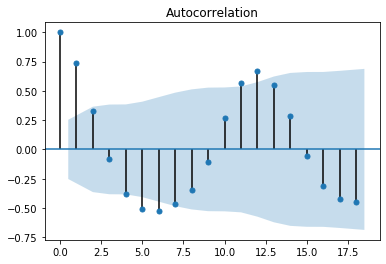

In [92]:
# Compute the acf array of HRB
acf_array = acf(data_R[['bikini']], fft=True )
print(acf_array)

#Plot the acf function
plot_acf((data_R[['bikini']]))
plt.show()

[ 1.          0.48419913  0.11994672 -0.03731269 -0.06679987 -0.13524809
 -0.26463536 -0.13378288 -0.00842491  0.02142857  0.10962371  0.31090576
  0.50749251  0.2526307  -0.04468864 -0.14320679 -0.14841825 -0.1508325
 -0.20959041 -0.10031635 -0.00562771  0.08266733  0.10662671  0.26694972
  0.26893107  0.06411921 -0.13559774 -0.21373626 -0.14272394 -0.19059274
 -0.14975025 -0.0483683  -0.02790543  0.0491009   0.08305028  0.20401265
  0.18081918 -0.04137529 -0.14538795 -0.14120879 -0.07868798]


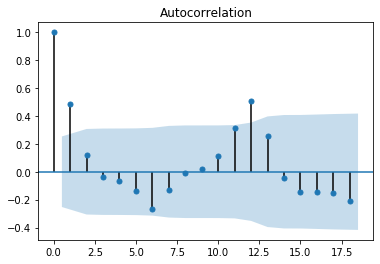

In [93]:
# Compute the acf array of HRB
acf_array = acf(data_R[['diet']], fft=True )
print(acf_array)

#Plot the acf function
plot_acf((data_R[['diet']]))
plt.show()

# Removing seasonality

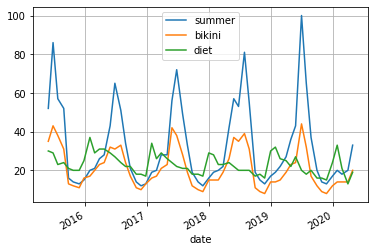

In [94]:
data_R.plot(x='date', y = ['summer', 'bikini', 'diet'], grid=True)

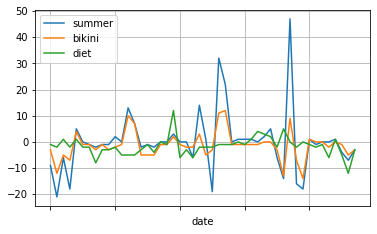

In [95]:
data_NS = data_R.diff(12)
data_NS = data_NS.dropna()
data_NS.plot(x='date', y = ['summer', 'bikini', 'diet'], grid=True)

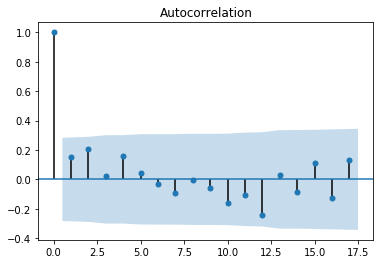

In [96]:
plot_acf((data_NS[['diet']]))
plt.show()

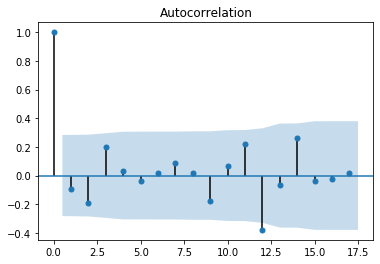

In [97]:
plot_acf((data_NS[['summer']]))
plt.show()

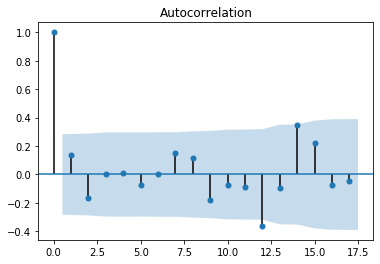

In [98]:
plot_acf((data_NS[['bikini']]))
plt.show()